In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(t_imgs, t_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
t_imgs = t_imgs / 255.0
test_imgs = test_imgs / 255.0
t_imgs.shape

(60000, 28, 28)

In [18]:
inputs = keras.Input(shape=(28, 28))

In [19]:
x = keras.layers.Flatten()(inputs)

In [20]:
x = keras.layers.Dense(32, activation='relu')(x)

In [21]:
x = keras.layers.Dropout(0.5)(x)

In [22]:
x = keras.layers.Dense(64, activation='relu')(x)

In [23]:
output = keras.layers.Dense(10, activation='softmax')(x)

In [27]:
model = keras.Model(inputs=inputs, outputs=output)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________

In [29]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
history = model.fit(t_imgs,
                   t_labels,
                   epochs=30,
                   validation_data=(test_imgs, test_labels))

Epoch 1/30
1875/1875 [==============================] - 2s 989us/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/30
1875/1875 [==============================] - 2s 889us/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
1875/1875 [==============================] - 2s 881us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/30
1875/1875 [==============================] - ETA: 0s - loss: 2.3028 - accuracy: 0.09 - 2s 858us/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/30
1875/1875 [==============================] - 2s 875us/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/30
1875/1875 [==============================] - 2s 892us/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
1875/1875 [==============================] - 2s 908us/step - loss: 2.30

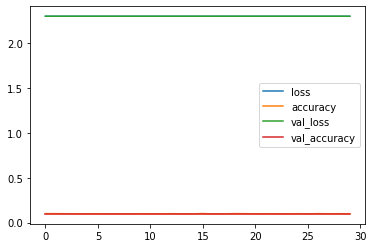

In [31]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('accuracy'), label='accuracy')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.plot(history.epoch, history.history.get('val_accuracy'), label='val_accuracy')
plt.legend()